## Mapeo logístico

In [1]:
function f(r0,rf,n,N)             # Función cuyas entradas son los extremos del intervalo para los valores de r y los números de iteraciones.
    r_valores = linspace(r0,rf,n) # Valores para r 
    res = []                      # Arreglo vacío que almacenará los valores obtenidos
    for r in r_valores            # Con este ciclo for se recorrerá el intervalo para r
        X = rand(1)               # Se va a escoger una condición inicial aleatoria
        x = X[1]
        for t in 1:N              # Ciclo que implementará la fórmula para el mapa logístico
            x = r*x*(1-x)
            end     
        push!(res, x)             # Para cada vuelta del ciclo, se agregará al arreglo res, el valor obtenido para x
    end
    return res                    # Se regresa el arreglo res
end

f (generic function with 1 method)

In [2]:
y = f(0,4,100000,1000);           # Para obtener el digrama de bifurcaciones, utilizaremos un intervalo de 100000 r´s con r de 0 a 4, el número de iteraciones a realizar será 1000. 

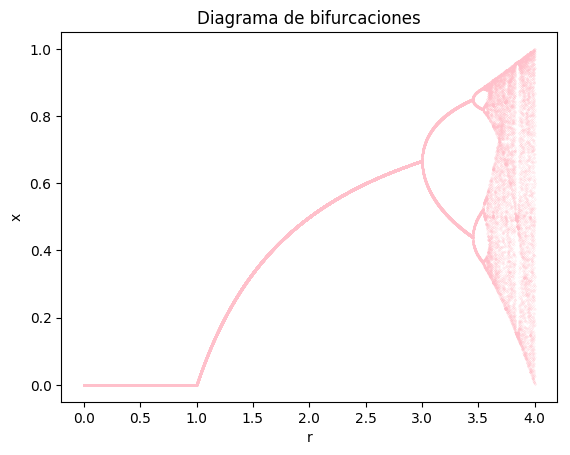

In [3]:
using PyPlot
xlabel("r")
ylabel("x")
title("Diagrama de bifurcaciones") 
r = linspace(0,4,100000)          # Intervalo a considerar 
scatter(r,y,color="pink",s = 0.01)          
show()

A partir de la gráfica, se observa que las bifurcaciones ocurren cuando para 3<r<3.6 y a partir de este último valor para r, se observa caos.

Para observar mejor el intervalo donde se observan las bifurcaciones, obtenemos el diagrama de bifucaciones en el intervalo para 2.8<r<4.

In [4]:
y = f(2.8,4,100000,1000);

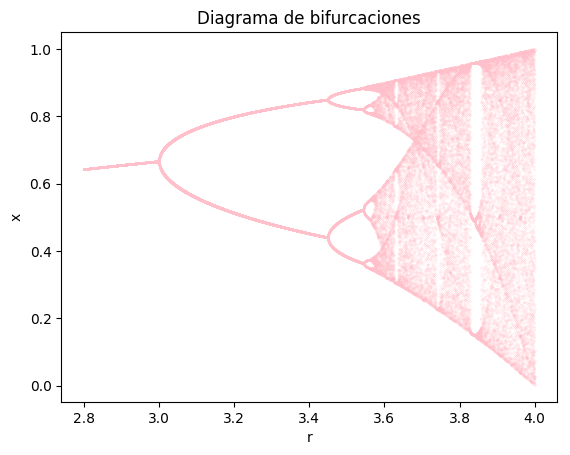

In [5]:
using PyPlot
xlabel("r")
ylabel("x")
title("Diagrama de bifurcaciones") 
r = linspace(2.8,4,100000)          # Intervalo a considerar 
scatter(r,y,color="pink",s = 0.01)          
show()

In [6]:
function exponente_de_Lyapunov(r0,rf,n,N,x0)
    r_valores = linspace(r0,rf,n)   # Valores para r 
    lambdas = []                    # Arreglo vacío que almacenará los valores del exponente de Lyapunov
    for r in r_valores              # Con este ciclo for se recorrerá el intervalo para r
        x = x0                      # Condición inicial
        suma = 0                    # Inicializamos suma como cero 
        for t in 1:N                # Ciclo que implementará la fórmula para el mapa logístico
            x = r*x*(1-x)
            suma = suma + log(abs(r-2*r*x))    # A suma le agregamos el valor de la derivada obtenida para cada vuelta del ciclo  
        end     
         lambda = suma/N            # Dividimos la suma obtenida para cada r entre N 
            push!(lambdas, lambda)  # Agregamos el valor obtenido para el exponente de Lyapunov para cada r
    end
    return lambdas                  # La función nos regresa el arreglo para las lambdas
end

exponente_de_Lyapunov (generic function with 1 method)

In [7]:
exp_lambdas = exponente_de_Lyapunov(2,4,200,90,0.1);  # Utilizando un intervalo de 200 r´s con r de 2 a 4, el número de iteraciones a realizar será 90 y  el punto inicial será 0.1. 

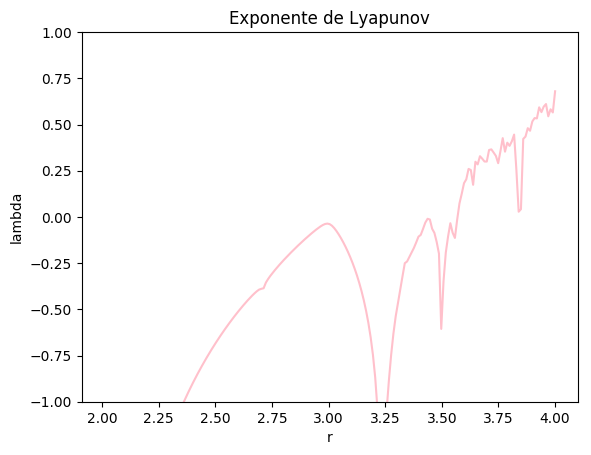

In [8]:
using PyPlot
xlabel("r")
ylabel("lambda")
title("Exponente de Lyapunov") 
r = linspace(2,4,200)          #Intervalo a considerar 
plot(r,exp_lambdas,color="pink")
ymin, ymax = ylim()   
ylim( -1, 1)
show()

In [9]:
exp_lambdas = exponente_de_Lyapunov(3,4,240,295,0.1);   # Utilizando un intervalo de 240 r´s con r de 2 a 4, el número de iteraciones a realizar será 295 y  el punto inicial será 0.1. 

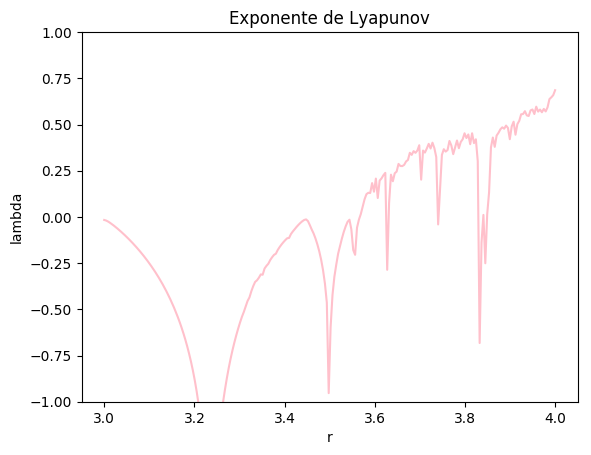

In [10]:
using PyPlot
xlabel("r")
ylabel("lambda")
title("Exponente de Lyapunov") 
r = linspace(3,4,240)          #Intervalo a considerar 
plot(r,exp_lambdas,color="pink")
ymin, ymax = ylim()   
ylim( -1, 1)
show()

A partir de la gráfica, se observa que el comienzo del caos es visible cuando r es aproximadamente 3.5, cuando lambda tiene por primera vez un valor positivo.

In [11]:
function F(x0,xf,n,r)             # Función cuyas entradas son los extremos del intervalo para los valores de r y los números de iteraciones.
    x = linspace(x0,xf,n)         # Intervalo de valores para x
    y = zeros(n)                  # Arreglo de n elementos para los valores de y(n) = x(n+1)
    for i in 2:length(x)          # Ciclo que implementará la fórmula para el mapa logístico
        y[i] = r*x[i]*(1-x[i])
    end
    return y                      # La función regresará el arreglo con los valores de y
end   

F (generic function with 1 method)

In [12]:
# Listas que almacenarán los valores obtenidos para y, variando el valor para r=0,1,2,3 y 4.
y1 = F(0,1,1000,0);
y3 = F(0,1,1000,1);
y4 = F(0,1,1000,2);
y5 = F(0,1,1000,3);
y6 = F(0,1,1000,4);

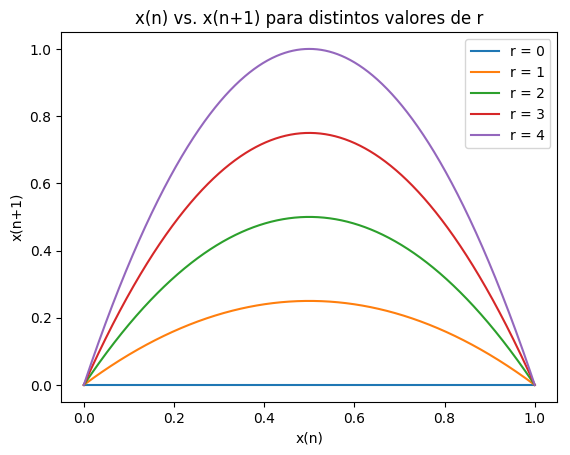

In [13]:
using PyPlot
xlabel("x(n)")
ylabel("x(n+1)")
title("x(n) vs. x(n+1) para distintos valores de r") 
x = linspace(0,1,1000)          # Intervalo a considerar 
plot(x,y1, label = "r = 0") 
legend()
plot(x,y3, label = "r = 1")  
legend()
plot(x,y4, label = "r = 2")
legend()
plot(x,y5, label = "r = 3")
legend()
plot(x,y6, label = "r = 4")
legend()
show()

Observamos parábolas que cambian su curvatura con r.